# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools1 import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets

my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price

response_btc = requests.get(btc_url).json()
response_btc

{'data': {'1': {'id': 1,
   'name': 'Bitcoin',
   'symbol': 'BTC',
   'website_slug': 'bitcoin',
   'rank': 1,
   'circulating_supply': 19592931,
   'total_supply': 19592931,
   'max_supply': 21000000,
   'quotes': {'USD': {'price': 44786.0,
     'volume_24h': 23388934307,
     'market_cap': 879520689971,
     'percentage_change_1h': -0.446139097461159,
     'percentage_change_24h': 1.07030981787664,
     'percentage_change_7d': 5.08590482381158,
     'percent_change_1h': -0.446139097461159,
     'percent_change_24h': 1.07030981787664,
     'percent_change_7d': 5.08590482381158},
    'CAD': {'price': 60841.781,
     'volume_24h': 31773867256.0595,
     'market_cap': 1194828857325.6,
     'percent_change_1h': -0.446139097461159,
     'percent_change_24h': 1.07030981787664,
     'percent_change_7d': 5.08590482381158}},
   'last_updated': 1704727350}},
 'metadata': {'timestamp': 1704727350,
  'num_cryptocurrencies': 3119,
  'error': None}}

In [6]:
current_btc_price = 60841.781

In [7]:
# Fetch current ETH price

response_eth = requests.get(eth_url).json()
response_eth

{'data': {'1027': {'id': 1027,
   'name': 'Ethereum',
   'symbol': 'ETH',
   'website_slug': 'ethereum',
   'rank': 2,
   'circulating_supply': 120184189,
   'total_supply': 120184189,
   'max_supply': 120184189,
   'quotes': {'USD': {'price': 2260.33,
     'volume_24h': 15348459910,
     'market_cap': 272073830205,
     'percentage_change_1h': -0.232150975468199,
     'percentage_change_24h': 0.808589063857975,
     'percentage_change_7d': -1.74859552855191,
     'percent_change_1h': -0.232150975468199,
     'percent_change_24h': 0.808589063857975,
     'percent_change_7d': -1.74859552855191},
    'CAD': {'price': 3070.658305,
     'volume_24h': 20850882787.735,
     'market_cap': 369612298333.492,
     'percent_change_1h': -0.232150975468199,
     'percent_change_24h': 0.808589063857975,
     'percent_change_7d': -1.74859552855191}},
   'last_updated': 1704727378}},
 'metadata': {'timestamp': 1704727378,
  'num_cryptocurrencies': 3119,
  'error': None}}

In [8]:
current_eth_price = 3070.658305

In [9]:
# Compute current value of my crypto

my_btc_value = my_btc * current_btc_price
my_btc_value

73010.1372

In [10]:
my_eth_value = my_eth * current_eth_price
my_eth_value

16274.4890165

In [11]:
total_crypto_wallet = my_btc_value + my_eth_value
total_crypto_wallet

89284.6262165

In [12]:
# Print current crypto wallet balance

print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $73010.14
The current value of your 5.3 ETH is $16274.49


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [14]:
# Set current amount of shares

my_agg = 200
my_spy = 50

In [15]:
# Set Alpaca API key and secret
api_key = os.getenv('ALPACA_API_KEY')
secret_key = os.getenv('ALPACA_SECRET_KEY')

# Create the Alpaca API object
alpaca = tradeapi.REST(api_key, secret_key, api_version='v2') # do I use v2 or v2?

In [32]:
# Format current date as ISO format
today = pd.Timestamp('2023-12-29',tz='America/New_York').isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

In [33]:
# Get current closing prices for SPY and AGG

df_portfolio = alpaca.get_bars(tickers, timeframe, start = today, end = today).df
df_portfolio

close     high     low  trade_count    open  \
timestamp                                                                 
2023-12-29 05:00:00+00:00   99.25   99.425   99.13        26060   99.20   
2023-12-29 05:00:00+00:00  475.31  477.030  473.30       604247  476.49   

                              volume        vwap symbol  
timestamp                                                
2023-12-29 05:00:00+00:00    7327722   99.285422    AGG  
2023-12-29 05:00:00+00:00  122268009  475.364010    SPY

In [37]:
# Reorganize the DataFrame
# Separate ticker data

AGG = df_portfolio[df_portfolio['symbol'] == 'AGG']
AGG = AGG.drop('symbol',axis=1)

SPY = df_portfolio[df_portfolio['symbol'] == 'SPY'].drop('symbol',axis=1)

In [38]:
AGG

close    high    low  trade_count  open   volume  \
timestamp                                                                     
2023-12-29 05:00:00+00:00  99.25  99.425  99.13        26060  99.2  7327722   

                                vwap  
timestamp                             
2023-12-29 05:00:00+00:00  99.285422

In [39]:
SPY

close    high    low  trade_count    open  \
timestamp                                                               
2023-12-29 05:00:00+00:00  475.31  477.03  473.3       604247  476.49   

                              volume       vwap  
timestamp                                        
2023-12-29 05:00:00+00:00  122268009  475.36401

In [40]:
# Concatenate the ticker DataFrames

df_portfolio = pd.concat([AGG,SPY], axis = 1, keys = ['AGG','SPY'])

# Preview DataFrame

df_portfolio

AGG                                            \
                           close    high    low trade_count  open   volume   
timestamp                                                                    
2023-12-29 05:00:00+00:00  99.25  99.425  99.13       26060  99.2  7327722   

                                         SPY                             \
                                vwap   close    high    low trade_count   
timestamp                                                                 
2023-12-29 05:00:00+00:00  99.285422  475.31  477.03  473.3      604247   

                                                         
                             open     volume       vwap  
timestamp                                                
2023-12-29 05:00:00+00:00  476.49  122268009  475.36401

In [41]:
# Pick AGG and SPY close prices

AGG_close_price = df_portfolio['AGG']['close'].iloc[0]
SPY_close_price = df_portfolio['SPY']['close'].iloc[0]

# Print AGG and SPY close prices

print(f"Current AGG closing price: ${AGG_close_price}")
print(f"Current SPY closing price: ${SPY_close_price}")

Current AGG closing price: $99.25
Current SPY closing price: $475.31


In [48]:
# Compute the current value of shares

AGG_value = AGG_close_price * my_agg
SPY_value = SPY_close_price * my_spy

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${SPY_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${AGG_value:0.2f}")

The current value of your 50 SPY shares is $23765.50
The current value of your 200 AGG shares is $19850.00


In [50]:
total_shares = AGG_value + SPY_value
print(f"${total_shares}")

$43615.5


### Savings Health Analysis

In [52]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
# already done above

# Create savings DataFrame
df_savings = pd.DataFrame({"amount": [total_crypto_wallet, total_shares]}, index = ["crypto", "shares"])

# Display savings DataFrame
display(df_savings)

amount
crypto  89284.626216
shares  43615.500000

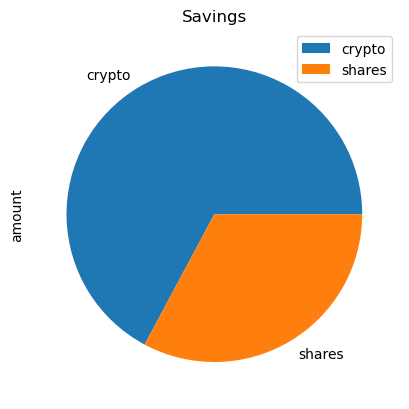

In [55]:
# Plot savings pie chart

df_savings.plot.pie(y='amount',title='Savings');

In [60]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = total_crypto_wallet + total_shares

# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations! You have enough money for an emergency fund.")
if total_savings == emergency_fund:
    print("Congratulations! You've reached your emergency fund goal.")
if total_savings < emergency_fund:
    print(f"You are ${emergency_fund - total_savings} short from reaching your goal.")

Congratulations! You have enough money for an emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [61]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2018-12-30', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2023-12-30', tz='America/New_York').isoformat()

In [66]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_bars(tickers,timeframe, start = start_date, end = end_date).df

# Reorganize the DataFrame
# Separate ticker data

AGG = df_stock_data[df_stock_data['symbol'] == 'AGG']
AGG = AGG.drop('symbol',axis=1)

SPY = df_stock_data[df_stock_data['symbol'] == 'SPY'].drop('symbol',axis=1)

# Concatenate the ticker DataFrames
df_stock_data = pd.concat([SPY,AGG], axis=1, keys=["SPY","AGG"])

# Display sample data
df_stock_data.head()


SPY                                      \
                            close    high     low trade_count    open   
timestamp                                                               
2018-12-31 05:00:00+00:00  250.08  250.19  247.47      591024  249.56   
2019-01-02 05:00:00+00:00  250.23  251.21  245.95      603603  245.98   
2019-01-03 05:00:00+00:00  244.15  248.57  243.67      698036  248.23   
2019-01-04 05:00:00+00:00  252.39  253.11  247.17      708230  247.59   
2019-01-07 05:00:00+00:00  254.29  255.95  251.69      449993  252.69   

                                                     AGG                     \
                              volume        vwap   close     high       low   
timestamp                                                                     
2018-12-31 05:00:00+00:00  147557713  249.158331  106.49  106.510  106.1100   
2019-01-02 05:00:00+00:00  132165224  249.138858  106.57  106.610  106.4701   
2019-01-03 05:00:00+00:00  146823673  245.630167  107.01  107.075  106.5700   
2019-01-04 05:00:00+00:00  145055352  250.484620  106.69  106.720  106.5500   
2019-01-07 05:00:00+00:00  105208591  254.071648  106.51  106.790  106.4600   

                                                                     
                          trade_count    open    volume        vwap  
timestamp                                                            
2018-12-31 05:00:00+00:00       27920  106.12  10613435  106.394350  
2019-01-02 05:00:00+00:00       27947  106.55  11665497  106.543515  
2019-01-03 05:00:00+00:00       20214  106.57   6661940  106.935661  
2019-01-04 05:00:00+00:00       19548  106.66   8392420  106.640950  
2019-01-07 05:00:00+00:00       23936  106.72   7636381  106.586821

In [ ]:
?MCSimulation

In [69]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns

MC_30years = MCSimulation(
    portfolio_data = df_stock_data,
    weights=[.60,.40],
    num_simulation=500,
    num_trading_days=252*30,
)

In [71]:
# Printing the simulation input data
MC_30years.portfolio_data.head()

SPY                                      \
                            close    high     low trade_count    open   
timestamp                                                               
2018-12-31 05:00:00+00:00  250.08  250.19  247.47      591024  249.56   
2019-01-02 05:00:00+00:00  250.23  251.21  245.95      603603  245.98   
2019-01-03 05:00:00+00:00  244.15  248.57  243.67      698036  248.23   
2019-01-04 05:00:00+00:00  252.39  253.11  247.17      708230  247.59   
2019-01-07 05:00:00+00:00  254.29  255.95  251.69      449993  252.69   

                                                                  AGG  \
                              volume        vwap daily_return   close   
timestamp                                                               
2018-12-31 05:00:00+00:00  147557713  249.158331          NaN  106.49   
2019-01-02 05:00:00+00:00  132165224  249.138858     0.000600  106.57   
2019-01-03 05:00:00+00:00  146823673  245.630167    -0.024298  107.01   
2019-01-04 05:00:00+00:00  145055352  250.484620     0.033750  106.69   
2019-01-07 05:00:00+00:00  105208591  254.071648     0.007528  106.51   

                                                                            \
                              high       low trade_count    open    volume   
timestamp                                                                    
2018-12-31 05:00:00+00:00  106.510  106.1100       27920  106.12  10613435   
2019-01-02 05:00:00+00:00  106.610  106.4701       27947  106.55  11665497   
2019-01-03 05:00:00+00:00  107.075  106.5700       20214  106.57   6661940   
2019-01-04 05:00:00+00:00  106.720  106.5500       19548  106.66   8392420   
2019-01-07 05:00:00+00:00  106.790  106.4600       23936  106.72   7636381   

                                                    
                                 vwap daily_return  
timestamp                                           
2018-12-31 05:00:00+00:00  106.394350          NaN  
2019-01-02 05:00:00+00:00  106.543515     0.000751  
2019-01-03 05:00:00+00:00  106.935661     0.004129  
2019-01-04 05:00:00+00:00  106.640950    -0.002990  
2019-01-07 05:00:00+00:00  106.586821    -0.001687

In [72]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0          1         2          3          4          5    \
0     1.000000   1.000000  1.000000   1.000000   1.000000   1.000000   
1     0.991889   1.013213  0.991311   0.996808   1.006230   1.001893   
2     1.004918   1.022267  0.990552   0.984122   1.007829   0.986502   
3     1.022560   1.013141  0.991351   0.969598   0.993064   0.976602   
4     1.020469   1.010899  0.983439   0.967409   0.977545   0.973585   
...        ...        ...       ...        ...        ...        ...   
7556  7.610809  12.947160  4.808147  11.627144  14.768795  11.317935   
7557  7.556373  12.933619  4.813751  11.642530  14.616790  11.309638   
7558  7.598577  12.853689  4.785941  11.682289  14.747664  11.230406   
7559  7.538876  12.893066  4.810591  11.582931  14.673041  11.037834   
7560  7.585297  12.838371  4.768201  11.526863  14.721753  11.020025   

            6         7          8         9    ...        490        491  \
0      1.000000  1.000000   1.000000  1.000000  ...   1.000000   1.000000   
1      0.999036  0.998381   1.020064  0.993063  ...   1.002999   1.015728   
2      0.994450  0.997451   1.028383  0.983768  ...   1.003445   1.005042   
3      1.000264  1.001065   1.027602  0.994511  ...   0.981987   1.001774   
4      1.003980  0.988631   1.033169  1.002492  ...   0.977942   1.002704   
...         ...       ...        ...       ...  ...        ...        ...   
7556  16.198563  4.452953  10.483726  4.229807  ...  11.291218  59.131492   
7557  16.406877  4.428372  10.416694  4.200351  ...  11.422454  58.934699   
7558  16.416815  4.457580  10.317534  4.228656  ...  11.401568  58.713513   
7559  16.500351  4.471835  10.345126  4.200650  ...  11.446821  59.119790   
7560  16.771795  4.444596  10.327740  4.269258  ...  11.541548  58.513007   

            492        493        494       495       496       497       498  \
0      1.000000   1.000000   1.000000  1.000000  1.000000  1.000000  1.000000   
1      0.999461   0.992041   1.011736  1.007218  1.007109  1.001775  0.999516   
2      1.005410   0.986606   1.024508  0.999034  1.008003  1.007377  1.010144   
3      0.999991   0.980884   1.033167  0.998991  1.013770  0.998309  1.015231   
4      1.000493   0.977188   1.035121  1.006756  1.022555  0.994292  1.014789   
...         ...        ...        ...       ...       ...       ...       ...   
7556  22.542498  13.374157  32.481464  8.220324  7.711251  7.309069  6.628553   
7557  22.404050  13.472445  32.897318  8.303941  7.711919  7.208664  6.616170   
7558  22.427716  13.461871  33.035745  8.378226  7.625729  7.200183  6.665882   
7559  22.632566  13.270222  33.109142  8.374100  7.600742  7.285644  6.642009   
7560  22.696590  13.320890  32.953359  8.274197  7.633570  7.365378  6.637642   

            499  
0      1.000000  
1      1.007043  
2      0.998416  
3      0.989433  
4      0.983172  
...         ...  
7556  27.671682  
7557  27.955650  
7558  27.994327  
7559  27.777919  
7560  27.454246  

[7561 rows x 500 columns]

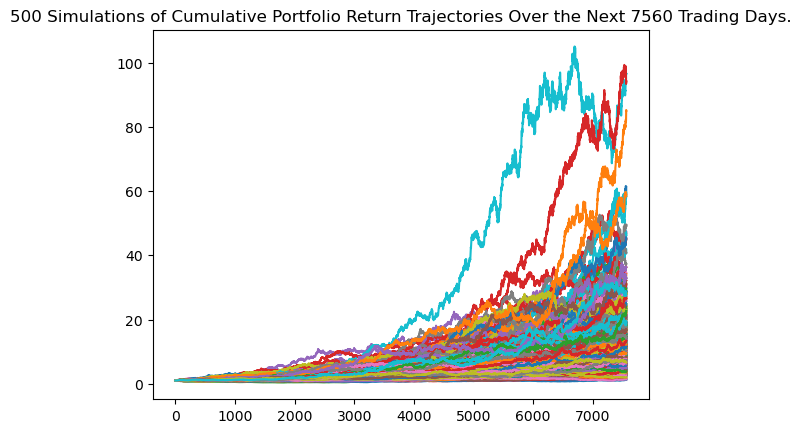

In [74]:
# Plot simulation outcomes
line_plot_30yr = MC_30years.plot_simulation()

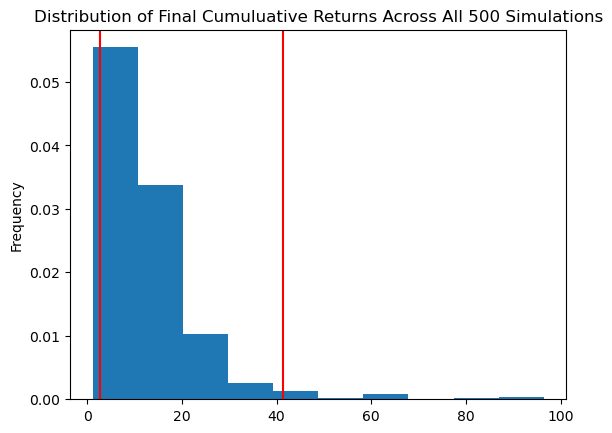

In [75]:
# Plot probability distribution and confidence intervals
dist_plot_30yr = MC_30years.plot_distribution()

### Retirement Analysis

In [76]:
# Fetch summary statistics from the Monte Carlo simulation results
MCS_results_30yr = MC_30years.summarize_cumulative_return()

# Print summary statistics
print(MCS_results_30yr) 

count           500.000000
mean             13.138748
std              11.055157
min               1.189646
25%               6.505180
50%              10.333628
75%              16.748203
max              96.412774
95% CI Lower      2.728920
95% CI Upper     41.310126
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [80]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(MCS_results_30yr[8]*20000,2)
ci_upper = round(MCS_results_30yr[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $54578.41 and $826202.53


/var/folders/3q/tg0639ln6j1347g5_ff9jvbw0000gn/T/ipykernel_88123/368254637.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ci_lower = round(MCS_results_30yr[8]*20000,2)
/var/folders/3q/tg0639ln6j1347g5_ff9jvbw0000gn/T/ipykernel_88123/368254637.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ci_upper = round(MCS_results_30yr[9]*20000,2)


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [83]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(MCS_results_30yr[8]*30000,2)
ci_upper = round(MCS_results_30yr[9]*30000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $81867.61 and $1239303.79


/var/folders/3q/tg0639ln6j1347g5_ff9jvbw0000gn/T/ipykernel_88123/3709348466.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ci_lower = round(MCS_results_30yr[8]*30000,2)
/var/folders/3q/tg0639ln6j1347g5_ff9jvbw0000gn/T/ipykernel_88123/3709348466.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ci_upper = round(MCS_results_30yr[9]*30000,2)


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [88]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# as per BCS, because of the shortened investment horizon, the portfolio needs to invest more heavily in the riskier asset—that is, stock—to help accumulate wealth for retirement
# weights adjusted to 80% stock and 20% bond

MC_5years = MCSimulation(
    portfolio_data = df_stock_data,
    weights=[.80,.20],
    num_simulation=500,
    num_trading_days=252*5,
)

In [89]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     0.996128  1.006561  0.989701  0.993856  0.985557  0.996549  1.006665   
2     0.990501  0.983021  0.977454  0.993265  0.996630  0.989249  1.006486   
3     0.994452  0.993839  0.973393  0.975480  1.002073  0.996029  1.012888   
4     0.982111  1.002998  0.963540  0.985116  1.009190  0.988085  1.032952   
...        ...       ...       ...       ...       ...       ...       ...   
1256  1.942001  1.492717  2.151320  1.773672  1.991843  1.460933  3.225166   
1257  1.903063  1.496111  2.135832  1.789796  1.993003  1.472206  3.230013   
1258  1.915387  1.480674  2.187277  1.798517  2.026701  1.476852  3.180301   
1259  1.931955  1.489761  2.217647  1.803616  2.044802  1.467645  3.190045   
1260  1.921865  1.494213  2.164797  1.828914  2.072487  1.469214  3.141379   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     0.984104  0.993583  0.991609  ...  1.007853  1.001685  0.992077   
2     0.985240  0.988601  0.982292  ...  1.031850  1.003268  0.988505   
3     0.987386  0.984890  0.992429  ...  1.052855  1.016983  0.985598   
4     0.984424  1.000761  0.983713  ...  1.061688  1.027242  0.993534   
...        ...       ...       ...  ...       ...       ...       ...   
1256  1.235348  1.283227  1.059310  ...  1.308166  4.397291  1.196638   
1257  1.216781  1.269322  1.063406  ...  1.317080  4.452957  1.221684   
1258  1.214730  1.248778  1.070951  ...  1.340720  4.377940  1.239578   
1259  1.214465  1.250130  1.080350  ...  1.340683  4.360199  1.244975   
1260  1.200966  1.259340  1.087459  ...  1.349111  4.297781  1.241725   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     1.027037  0.990061  0.987324  0.997547  1.005830  0.999758  1.008806  
2     1.005543  1.008225  0.989541  1.004765  0.991266  1.015864  0.991194  
3     0.999445  0.983609  0.986145  1.002494  0.998357  1.000992  0.974692  
4     0.993609  0.982121  0.978360  1.019669  1.004711  1.012907  0.961832  
...        ...       ...       ...       ...       ...       ...       ...  
1256  1.643242  2.025324  1.416993  1.624754  2.883439  2.474326  1.234094  
1257  1.634693  2.036211  1.421129  1.612275  2.865907  2.510266  1.230096  
1258  1.636073  2.027828  1.426786  1.597699  2.860152  2.468059  1.231969  
1259  1.612963  2.067664  1.467656  1.596793  2.846800  2.506617  1.240093  
1260  1.638067  2.077379  1.468002  1.600936  2.869406  2.561846  1.261367  

[1261 rows x 500 columns]

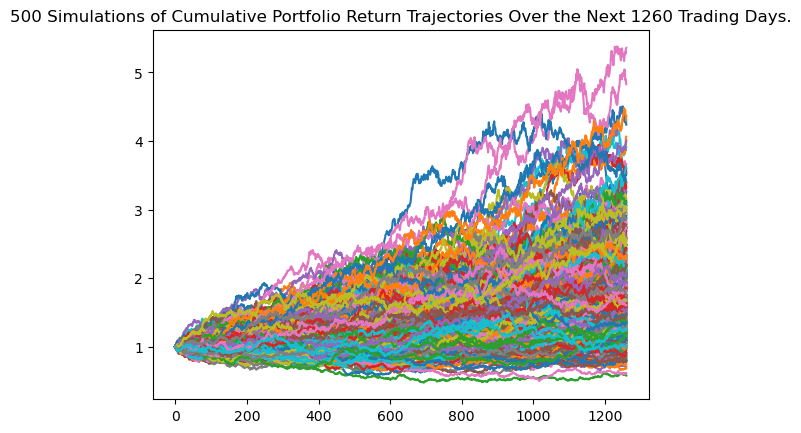

In [90]:
# Plot simulation outcomes
line_plot_5yr = MC_5years.plot_simulation()

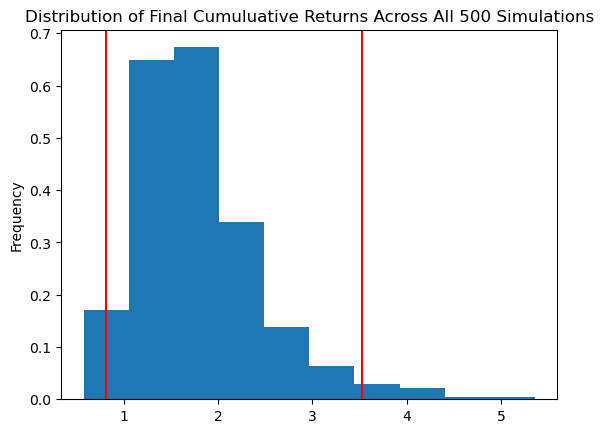

In [91]:
# Plot probability distribution and confidence intervals
dist_plot_5yr = MC_5years.plot_distribution()

In [92]:
# Fetch summary statistics from the Monte Carlo simulation results
MCS_5y_results = MC_5years.summarize_cumulative_return()

# Print summary statistics
print(MCS_5y_results)

count           500.000000
mean              1.780005
std               0.672658
min               0.576937
25%               1.305567
50%               1.648465
75%               2.081701
max               5.359961
95% CI Lower      0.813808
95% CI Upper      3.521162
Name: 1260, dtype: float64


In [93]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(MCS_5y_results[8]*60000,2)
ci_upper_five = round(MCS_5y_results[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $48828.49 and $211269.74


/var/folders/3q/tg0639ln6j1347g5_ff9jvbw0000gn/T/ipykernel_88123/590358477.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ci_lower_five = round(MCS_5y_results[8]*60000,2)
/var/folders/3q/tg0639ln6j1347g5_ff9jvbw0000gn/T/ipykernel_88123/590358477.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ci_upper_five = round(MCS_5y_results[9]*60000,2)


### Ten Years Retirement Option

In [94]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10years = MCSimulation(
    portfolio_data = df_stock_data,
    weights=[.80,.20],
    num_simulation=500,
    num_trading_days=252*10,
)

In [95]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     0.998089  1.008910  0.998614  1.007561  1.004078  0.998596  0.989884   
2     0.986364  0.999477  0.988387  1.003216  1.005150  0.997063  0.976618   
3     0.979967  0.991980  1.001878  0.996165  1.005988  0.994217  0.971565   
4     0.994332  0.990427  1.000003  0.982462  1.014599  0.988788  0.969703   
...        ...       ...       ...       ...       ...       ...       ...   
2516  1.889223  4.318401  2.056068  3.410962  2.988271  1.489012  2.245204   
2517  1.896431  4.255297  2.058437  3.384695  2.962205  1.482243  2.202108   
2518  1.891527  4.321730  2.058705  3.407053  2.981960  1.506895  2.205035   
2519  1.893646  4.237698  2.004039  3.437675  2.902342  1.506854  2.261881   
2520  1.924445  4.183040  1.975469  3.440426  2.923662  1.548145  2.283264   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     0.975143  1.000879  0.988750  ...  1.011353  1.008220  0.994466   
2     0.976433  0.983312  1.002404  ...  0.998632  1.008069  0.998309   
3     0.984041  0.991024  1.007985  ...  0.996376  0.989818  0.997502   
4     0.991387  0.987689  1.007007  ...  0.989523  0.973483  0.997067   
...        ...       ...       ...  ...       ...       ...       ...   
2516  6.134021  4.046097  2.196272  ...  1.299885  3.981731  2.210745   
2517  6.156776  4.049634  2.221321  ...  1.304487  4.006718  2.221692   
2518  6.269373  3.999545  2.207099  ...  1.287487  3.992234  2.238158   
2519  6.323645  4.023362  2.238987  ...  1.285497  3.981649  2.228683   
2520  6.364221  3.941096  2.235732  ...  1.291870  3.979605  2.217391   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     1.009656  1.009445  0.973156  1.008611  0.981906  0.988538  1.002910  
2     1.006370  1.007053  0.980970  1.016041  0.975567  0.984929  1.004195  
3     0.999191  1.005093  0.971736  1.004492  0.981288  0.983779  0.994756  
4     1.004649  0.997894  0.952547  1.006261  0.992854  0.976884  0.993759  
...        ...       ...       ...       ...       ...       ...       ...  
2516  1.385014  5.285670  3.392654  8.329221  5.326845  5.530267  5.075139  
2517  1.386961  5.296301  3.419321  8.416361  5.280109  5.415091  5.103459  
2518  1.403979  5.327778  3.439743  8.285367  5.308959  5.384385  5.196593  
2519  1.391001  5.379129  3.451381  8.289831  5.226474  5.345771  5.142784  
2520  1.380793  5.348512  3.397071  8.396900  5.190523  5.479779  5.061520  

[2521 rows x 500 columns]

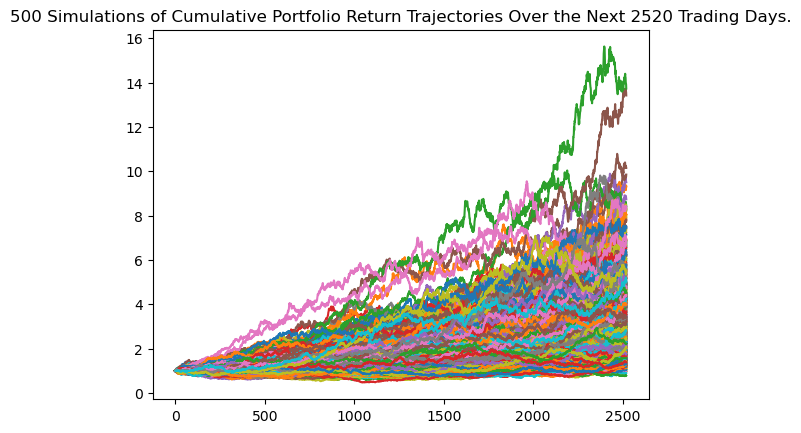

In [96]:
# Plot simulation outcomes
line_plot_10yr = MC_10years.plot_simulation()

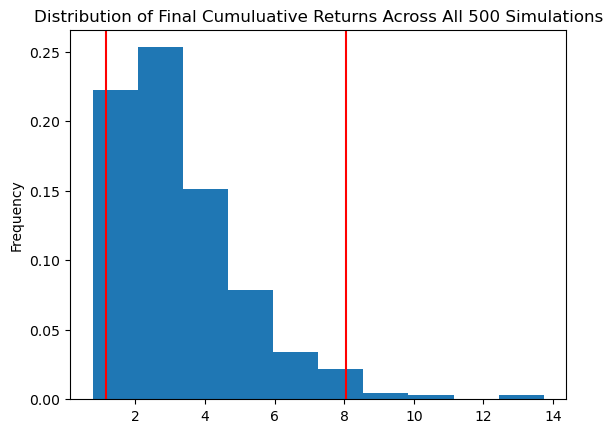

In [97]:
# Plot probability distribution and confidence intervals
dist_plot_10yr = MC_10years.plot_distribution()

In [98]:
# Fetch summary statistics from the Monte Carlo simulation results
MCS_10y_results = MC_10years.summarize_cumulative_return()

# Print summary statistics
print(MCS_10y_results)

count           500.000000
mean              3.304540
std               1.856589
min               0.779830
25%               1.927082
50%               2.819588
75%               4.201788
max              13.730159
95% CI Lower      1.162601
95% CI Upper      8.039175
Name: 2520, dtype: float64


In [99]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(MCS_10y_results[8]*60000,2)
ci_upper_ten = round(MCS_10y_results[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $69756.05 and $482350.47


/var/folders/3q/tg0639ln6j1347g5_ff9jvbw0000gn/T/ipykernel_88123/553208340.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ci_lower_ten = round(MCS_10y_results[8]*60000,2)
/var/folders/3q/tg0639ln6j1347g5_ff9jvbw0000gn/T/ipykernel_88123/553208340.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ci_upper_ten = round(MCS_10y_results[9]*60000,2)


### QUESTIONS

1. Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

2. Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years?

In [101]:
# answer the above before submitting

# 2. We have a larger initial investment here? Do I fix this and just look at the different wts over 10 yrs? 
# how much do they want to retire? this is not specified.
# 30 yr investment with 60/40 has a lower lower CI and a higher upper CI than 10 years. Not sure how to interpret
